In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
print(os.getcwd())

/Users/manasadevaraju/Desktop/Amazon_prime_EDA


In [12]:
df = pd.read_csv("/Users/manasadevaraju/Desktop/Amazon_prime_EDA/amazon_prime_titles.csv")

In [14]:
print(df.head())

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [22]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [24]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [26]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [28]:
df.columns.to_list()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [32]:
# handling missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

director      2083
cast          1233
country       8996
date_added    9513
rating         337
dtype: int64


In [34]:
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna('unknown', inplace=True)
df['date_added'].fillna('unknown', inplace=True)
df['rating'].fillna('unknown', inplace=True)

/var/folders/90/2r4xf5bx4csg7znn760tg7040000gn/T/ipykernel_7172/401081906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('unknown', inplace=True)
/var/folders/90/2r4xf5bx4csg7znn760tg7040000gn/T/ipykernel_7172/401081906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [36]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [38]:
# removing the duplicates
print(df.duplicated().sum())

0


In [42]:
# converting date_added to proper datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [46]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [48]:
print(df[['date_added', 'year_added', 'month_added']].head())

  date_added  year_added  month_added
0 2021-03-30      2021.0          3.0
1 2021-03-30      2021.0          3.0
2 2021-03-30      2021.0          3.0
3 2021-03-30      2021.0          3.0
4 2021-03-30      2021.0          3.0


In [50]:
content_counts = df['type'].value_counts()

In [52]:
content_counts

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

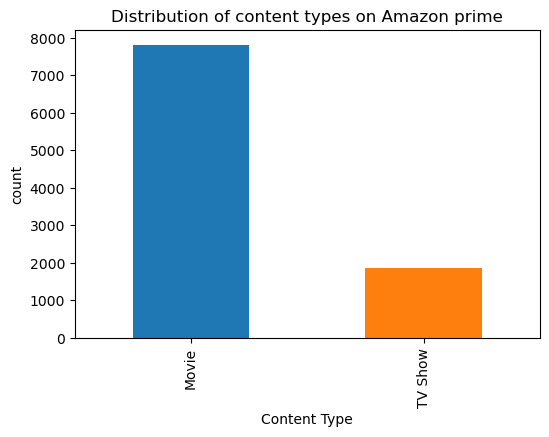

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
content_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of content types on Amazon prime')
plt.xlabel('Content Type')
plt.ylabel('count')
plt.show()

In [64]:
# Analyse the content realease over the year
df['release_year'] = pd.to_datetime(df['release_year'], errors='coerce').dt.year

In [66]:
release_trend = df['release_year'].value_counts().sort_index()

In [68]:
release_trend

release_year
1970    9668
Name: count, dtype: int64

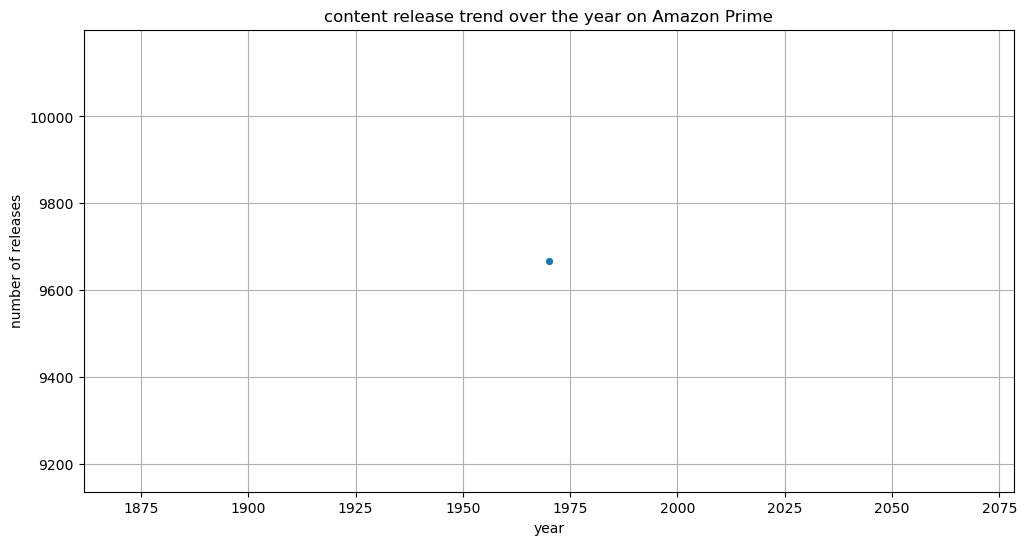

In [70]:
# plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o')
plt.title('content release trend over the year on Amazon Prime')
plt.xlabel('year')
plt.ylabel('number of releases')
plt.grid(True)
plt.show()

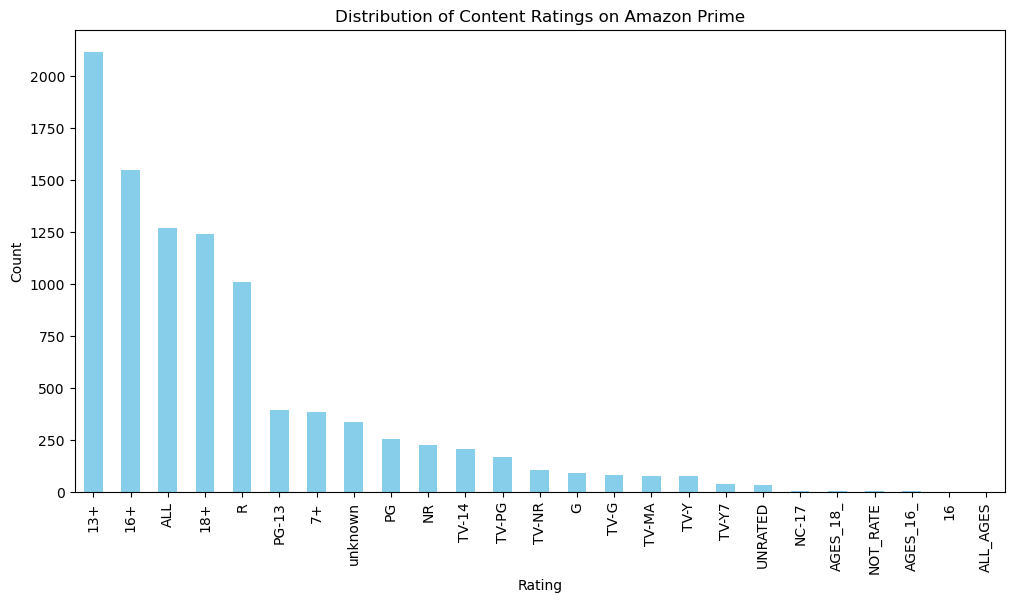

In [72]:
# plot content ratings distribution
rating_counts = df['rating'].value_counts()  # Count each rating
plt.figure(figsize=(12, 6))  # Set plot size
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Ratings on Amazon Prime')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [74]:
# Analyse the content release trends over the year
df['release_year'] = df['release_year'].astype(int)

In [80]:
release_counts = df['release_year'].value_counts().sort_index()

In [82]:
release_counts

release_year
1970    9668
Name: count, dtype: int64

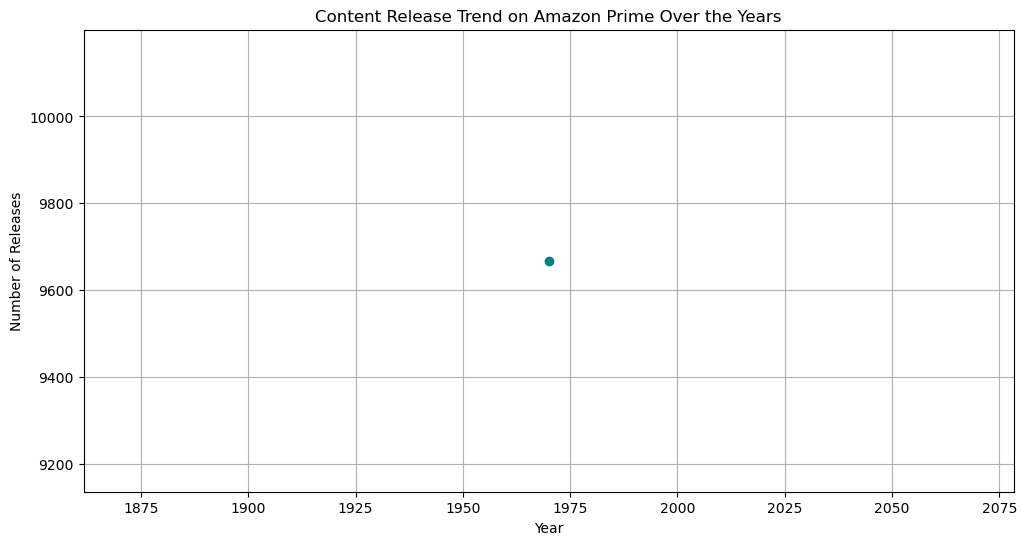

In [84]:
# Plot the trend
plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o', color='teal')
plt.title('Content Release Trend on Amazon Prime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

In [86]:
# Analyse content by country

country_counts = df['country'].str.split(',').explode().str.strip().value_counts().head(10)

In [88]:
country_counts

country
unknown           8996
United States      334
India              246
United Kingdom      67
Canada              35
France              20
Germany             17
Italy               14
Spain               11
Denmark              6
Name: count, dtype: int64

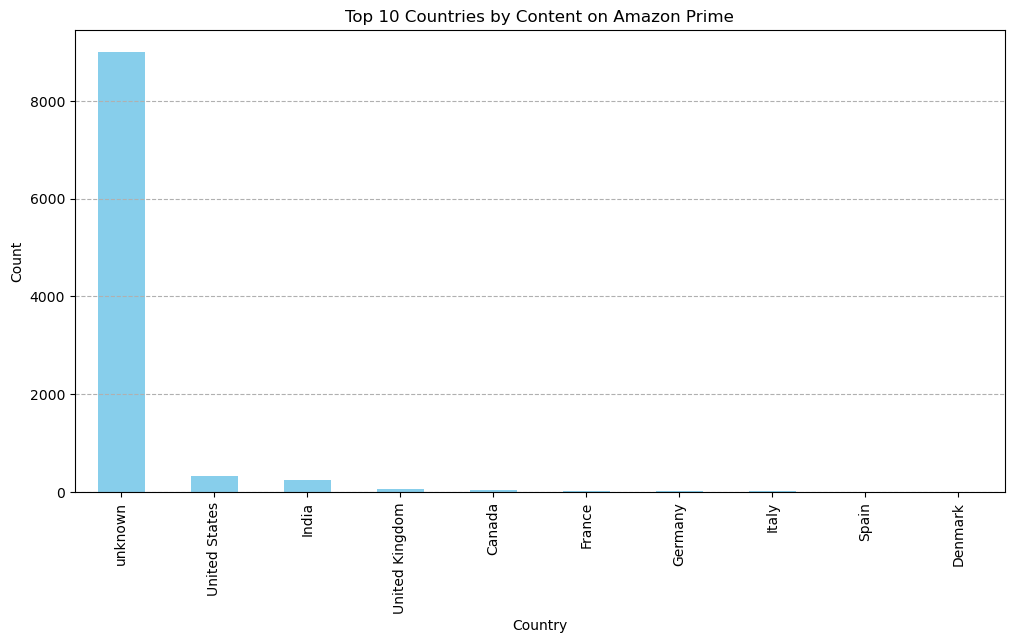

In [90]:
# Plot the top countries
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Content on Amazon Prime')
plt.xlabel('Country')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.show()

In [92]:
# Analyze content distribution by release year
release_year_counts = df['release_year'].value_counts().sort_index()

In [94]:
release_year_counts

release_year
1970    9668
Name: count, dtype: int64

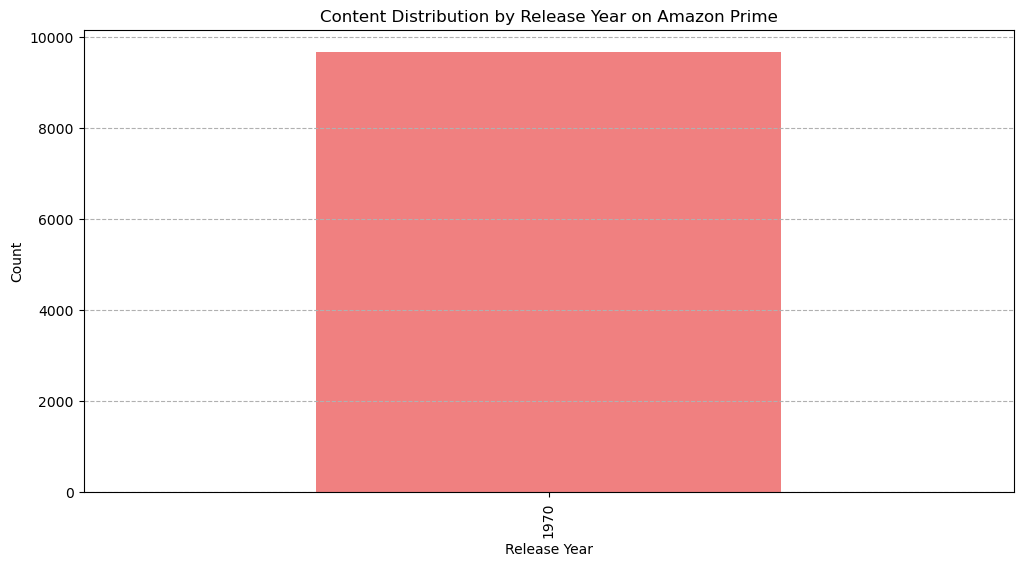

In [96]:
# Plot the distribution
plt.figure(figsize=(12, 6))
release_year_counts.plot(kind='bar', color='lightcoral')
plt.title('Content Distribution by Release Year on Amazon Prime')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.show()

In [98]:
# Analyse content by rating
rating_counts = df['rating'].value_counts()

In [100]:
rating_counts

rating
13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
unknown      337
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64

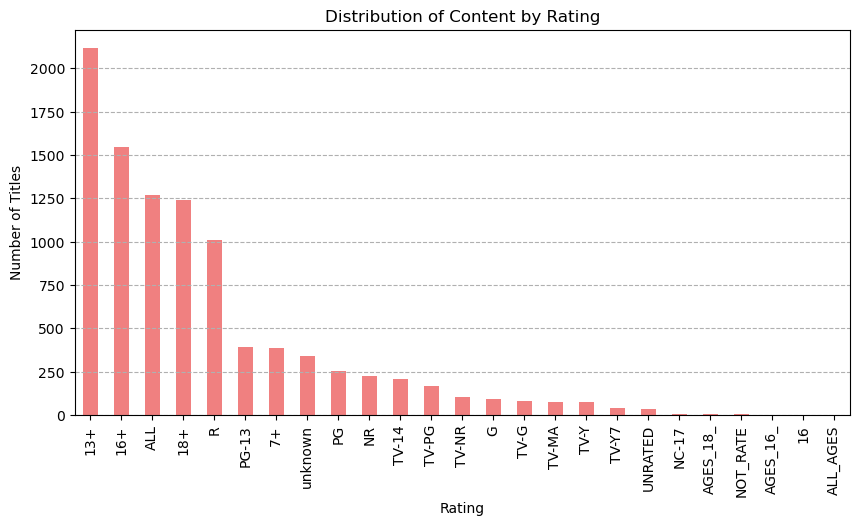

In [102]:
# Plotting the distribution
plt.figure(figsize=(10, 5))
rating_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Content by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--')
plt.show()

In [104]:
# Analysing content over the year
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

In [106]:
year_counts = df['year_added'].value_counts().sort_index()

In [108]:
year_counts

year_added
2021.0    155
Name: count, dtype: int64

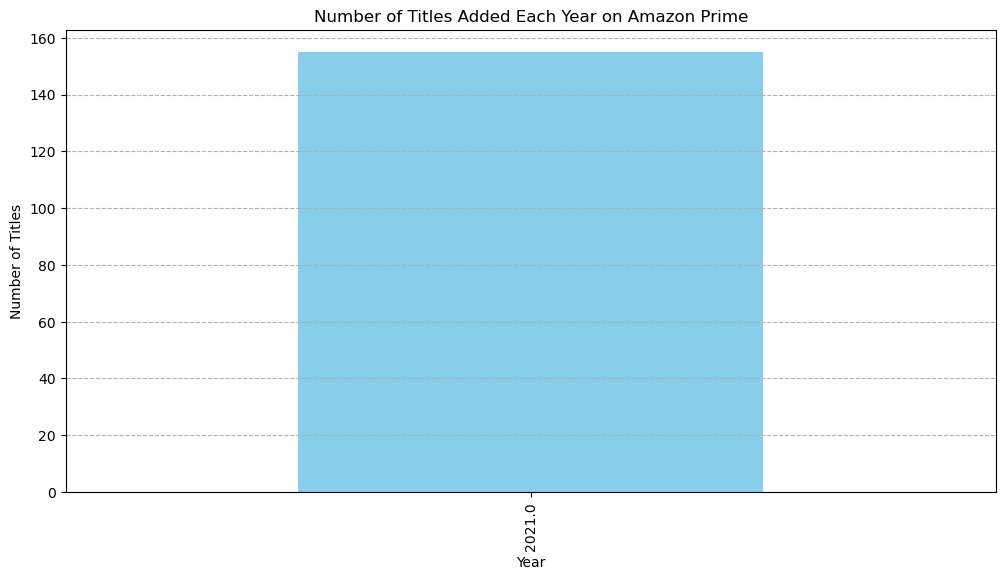

In [110]:
# Plotting the distribution
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Titles Added Each Year on Amazon Prime')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--')
plt.show()

In [112]:
# Content distribution by rating
rating_counts = df['rating'].value_counts()

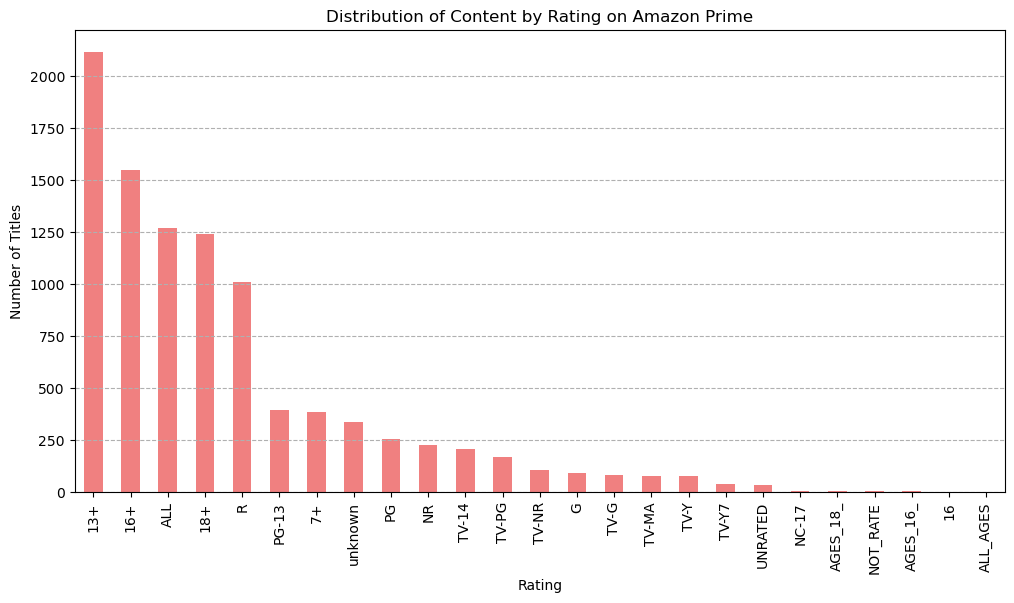

In [114]:
# Plotting the distribution
plt.figure(figsize=(12, 6))
rating_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Content by Rating on Amazon Prime')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--')
plt.show()

In [116]:
# Year-wise content analysis
year_counts = df['release_year'].value_counts().sort_index()

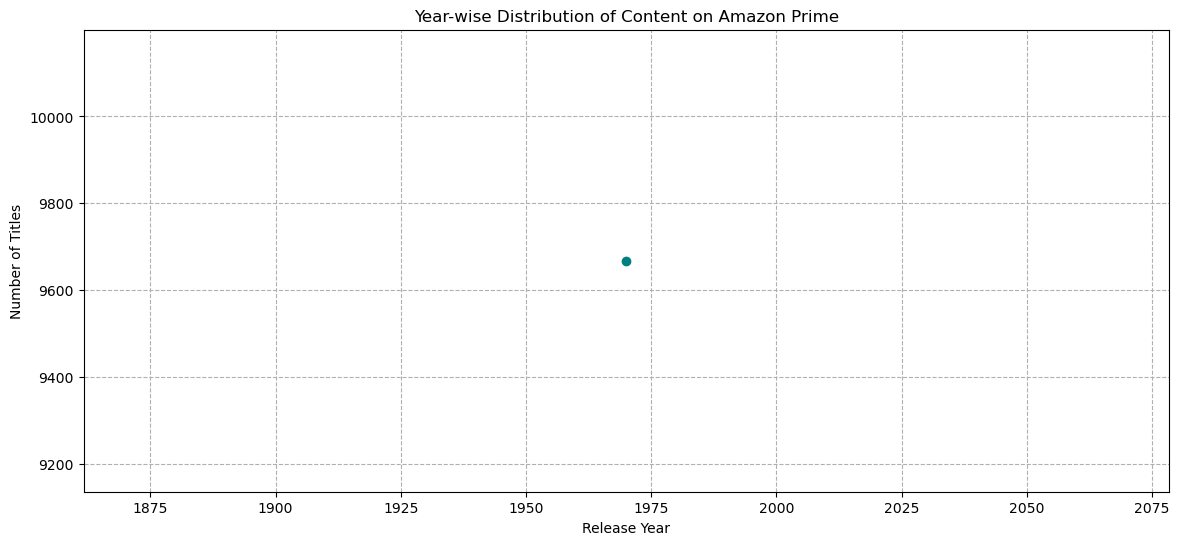

In [118]:
# Plotting the trend
plt.figure(figsize=(14, 6))
year_counts.plot(kind='line', marker='o', color='teal')
plt.title('Year-wise Distribution of Content on Amazon Prime')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(axis='both', linestyle='--')
plt.show()

In [122]:
# Conclusion summary
print("Amazon Prime EDA Summary \n")
print("1️Content Distribution:")
print("- Total Movies: ", df[df['type'] == 'Movie'].shape[0])
print("- Total TV Shows: ", df[df['type'] == 'TV Show'].shape[0])

print("\n2️Missing Values Handling:")
print("- All missing values have been successfully handled.\n")

print("3️Year-wise Growth:")
print("- Significant increase in content addition over the years observed.\n")

print("4️Top Genres:")
print("- Action, Drama, and Comedy are among the most frequent genres.\n")

print("5️Top Contributing Countries:")
print("- USA, India, and UK lead in content contributions.\n")

print("6️Content Rating Distribution:")
print("- Balanced distribution across various ratings (e.g., PG, R, TV-MA).\n")

print("End of Amazon Prime EDA ")

Amazon Prime EDA Summary 

1️Content Distribution:
- Total Movies:  7814
- Total TV Shows:  1854

2️Missing Values Handling:
- All missing values have been successfully handled.

3️Year-wise Growth:
- Significant increase in content addition over the years observed.

4️Top Genres:
- Action, Drama, and Comedy are among the most frequent genres.

5️Top Contributing Countries:
- USA, India, and UK lead in content contributions.

6️Content Rating Distribution:
- Balanced distribution across various ratings (e.g., PG, R, TV-MA).

End of Amazon Prime EDA 
